In [1]:
RESULT_DIR = "../out/2025-05-05_13-29-23_librispeech-pc-test-clean_large-v3-turbo"
# RESULT_DIR = "/home/niko/Downloads/results"

In [2]:
import os
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from src.eval.SampleResult import SampleResult

In [13]:
files = os.listdir(RESULT_DIR)
files = [f for f in files if f.endswith("final.json")]

# get ids from the first part of the filename separated by "_"
file_ids = [f.split("_")[0] for f in files]

samples = [SampleResult.load_by_id(RESULT_DIR, file_id) for file_id in file_ids]

In [14]:
for sample in samples:
    sample.build_alignments(normalize_words=True)

## Word first correct

The word first correct (wfc) is defined as the first correct occurence of a word.

In [15]:
from src.eval.metrics.word_first_correct import word_first_correct_response
wfc = [[word_first_correct_response(s.final, s.partials, i, s.alignments) for i in range(len(s.final))] for s in samples]

In [16]:
total_wfc = np.concat(wfc)
wfc_latency = np.array([r["latency"] for r in total_wfc if r is not None])
print("None values in wfc: ", np.sum(np.array([r is None for r in total_wfc])))

None values in wfc:  76


In [17]:
print("Min:", np.min(wfc_latency))
print("Max:", np.max(wfc_latency))
print("Mean:", np.mean(wfc_latency))
print("Median:", np.median(wfc_latency))
print("Std:", np.std(wfc_latency))
print("P95:", np.percentile(wfc_latency, 95))
print("P99:", np.percentile(wfc_latency, 99))

Min: -122.8367733088881
Max: 122.38507622674108
Mean: 1.8170361124198826
Median: 2.0306219151616105
Std: 8.49053502799428
P95: 4.851589579343794
P99: 8.345969580778451


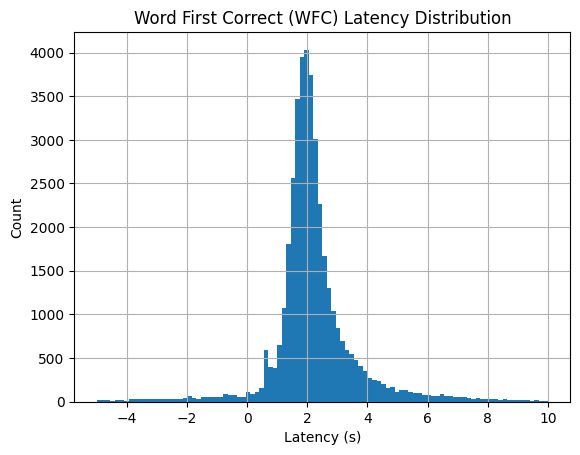

In [18]:
plt.hist(wfc_latency, bins=100, range=(-5, 10))
plt.xlabel("Latency (s)")
plt.ylabel("Count")
plt.title("Word First Correct (WFC) Latency Distribution")
plt.grid()

## Word first final

The word first final (wff) is defined as the first occurence after which a word will never change to a different prediction.

In [19]:
from src.eval.metrics.word_first_final import word_first_final_response
wff = [[word_first_final_response(s.final, s.partials, i, s.alignments) for i in range(len(s.final))] for s in samples]

In [20]:
total_wff = np.concat(wff)
wff_latency = np.array([r["latency"] for r in total_wff if r is not None])
print("None values in wff: ", np.sum(np.array([r is None for r in total_wff])))

None values in wff:  76


In [21]:
print("Min:", np.min(wff_latency))
print("Max:", np.max(wff_latency))
print("Mean:", np.mean(wff_latency))
print("Median:", np.median(wff_latency))
print("Std:", np.std(wff_latency))
print("P95:", np.percentile(wff_latency, 95))
print("P99:", np.percentile(wff_latency, 99))

Min: -122.8367733088881
Max: 143.80088769987225
Mean: 7.553217143960232
Median: 4.877008698061118
Std: 12.248238914373626
P95: 18.756994900792805
P99: 31.15041669251613


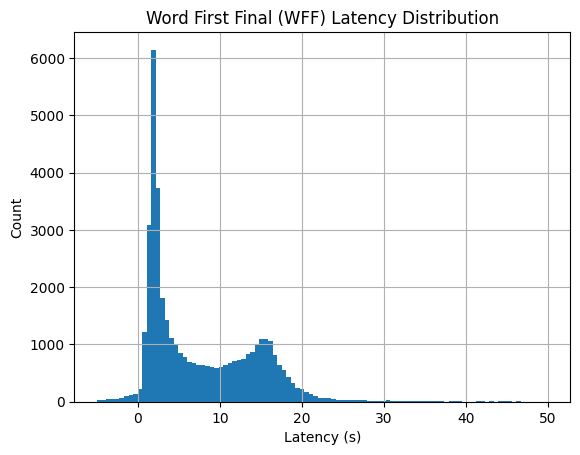

In [22]:
plt.hist(wff_latency, bins=100, range=(-5, 50))
plt.xlabel("Latency (s)")
plt.ylabel("Count")
plt.title("Word First Final (WFF) Latency Distribution")
plt.grid()